In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import numpy as np

            petrol  diesel
year                      
09/06/2003   74.59   76.77
16/06/2003   74.47   76.69
23/06/2003   74.42   76.62
30/06/2003   74.35   76.51
07/07/2003   74.28   76.46
...            ...     ...
30/01/2023  148.18  170.56
06/02/2023  148.32  170.36
13/02/2023  147.99  169.66
20/02/2023  147.86  169.30
27/02/2023  147.63  168.56

[1030 rows x 2 columns]


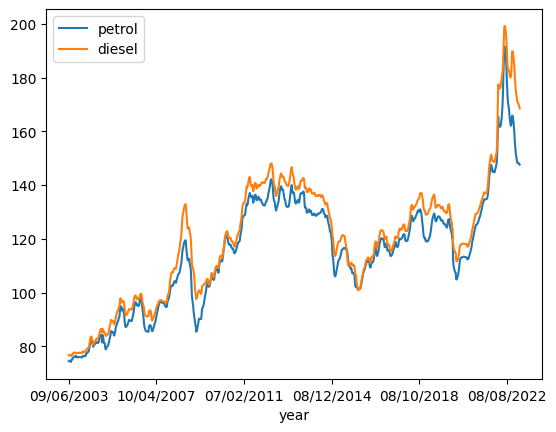

In [4]:
df = pd.read_csv('gas.csv')
df.columns=["year","petrol","diesel"]

df.set_index('year', inplace=True)
df.plot()
print(df)

In [5]:
def adfuller_test(ppm):
    result = adfuller(ppm)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value, label in zip(result,labels):
        print(f'{label}: {value}' )

    print('Stationary' if result[1] <= 0.05 else 'Non-stationary')

adfuller_test(df['petrol'])
print("-----------------------------------------------")
adfuller_test(df['diesel'])

ADF Test Statistic: -1.810963772019285
p-value: 0.3750322309541483
#Lags Used: 8
Number of Observations: 1021
Non-stationary
-----------------------------------------------
ADF Test Statistic: -1.4949692278773408
p-value: 0.5359985057548287
#Lags Used: 4
Number of Observations: 1025
Non-stationary


In [6]:
df['Petrol First Difference'] = df['petrol'] - df['petrol'].shift(1)
df['Petrol Seasonal First Difference']=df['petrol']-df['petrol'].shift(12)
df['Diesel First Difference'] = df['diesel'] - df['diesel'].shift(1)
df['Diesel Seasonal First Difference']=df['diesel']-df['diesel'].shift(12)

df

,petrol,diesel,Petrol First Difference,Petrol Seasonal First Difference,Diesel First Difference,Diesel Seasonal First Difference
year,,,,,,
09/06/2003,74.59,76.77,NaN,NaN,NaN,NaN
16/06/2003,74.47,76.69,-0.12,NaN,-0.08,NaN
23/06/2003,74.42,76.62,-0.05,NaN,-0.07,NaN
30/06/2003,74.35,76.51,-0.07,NaN,-0.11,NaN
07/07/2003,74.28,76.46,-0.07,NaN,-0.05,NaN
...,...,...,...,...,...,...
30/01/2023,148.18,170.56,-0.03,-17.44,-0.30,-19.23
06/02/2023,148.32,170.36,0.14,-16.08,-0.20,-18.49
13/02/2023,147.99,169.66,-0.33,-15.29,-0.70,-17.91


In [7]:
adfuller_test(df['Petrol Seasonal First Difference'].dropna())
print("-------------------------------------------")
adfuller_test(df['Diesel Seasonal First Difference'].dropna())

ADF Test Statistic: -7.045173588321671
p-value: 5.71140521663104e-10
#Lags Used: 14
Number of Observations: 1003
Stationary
-------------------------------------------
ADF Test Statistic: -4.295062287254489
p-value: 0.00045303995738840073
#Lags Used: 22
Number of Observations: 995
Stationary


<AxesSubplot:xlabel='year'>

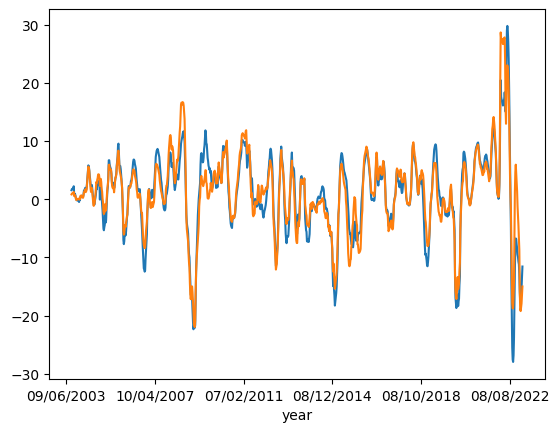

In [8]:
df['Petrol Seasonal First Difference'].plot()
df['Diesel Seasonal First Difference'].plot()

C:\Users\krypt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


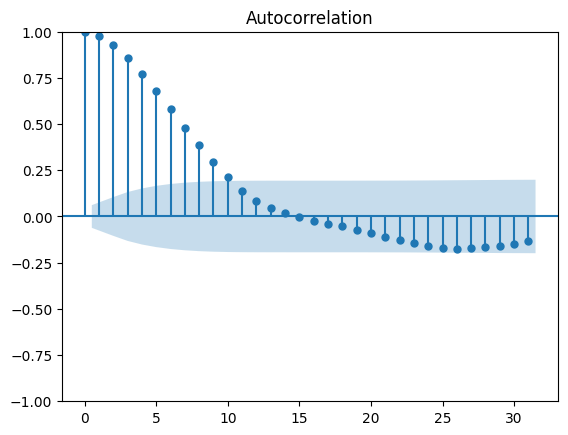

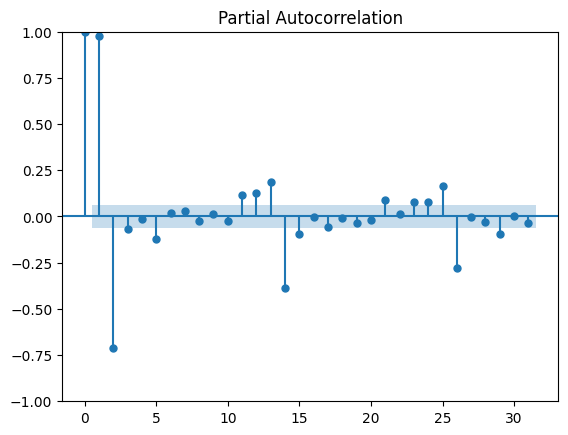

In [9]:
plot_acf(df['Petrol Seasonal First Difference'].dropna())
plot_pacf(df['Petrol Seasonal First Difference'].dropna())
plt.show()

In [10]:
# Define the ARIMA models
model_petrol = ARIMA(df['petrol'], order=(1,2,1))
model_diesel = ARIMA(df['diesel'], order=(1,2,1))

# Fit the models
model_fit_petrol = model_petrol.fit()
model_fit_diesel = model_diesel.fit()


C:\Users\krypt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
C:\Users\krypt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\krypt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will

In [11]:
future_petrol_prices = model_fit_petrol.forecast(steps=10).values
future_diesel_prices = model_fit_diesel.forecast(steps=10).values
print("diesel:\n",future_diesel_prices)
print("petrol:\n",future_petrol_prices)

diesel:
 [168.06518931 167.74287472 167.54191494 167.42633096 167.37081075
 167.35754671 167.37401083 167.41138937 167.46348167 167.52592541]
petrol:
 [147.49241209 147.41876064 147.38934444 147.39053295 147.41289572
 147.44990816 147.49705617 147.5512166  147.61022865 147.67259737]


C:\Users\krypt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\krypt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
